In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston


In [3]:
boston = load_boston()

boston.keys()
feature_names = boston["feature_names"]

feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
from sklearn.model_selection import train_test_split
data = boston["data"]
target = boston["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [12]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [13]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head()

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [14]:
mse1 = (check_test["error"] ** 2).mean()

mse1

21.517444231177

In [15]:
lr.intercept_


array([31.63108404])

In [16]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

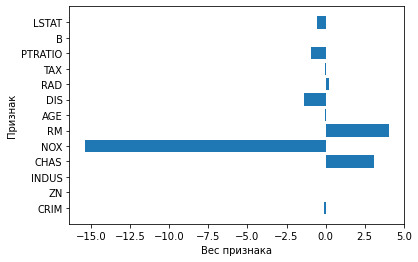

In [17]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

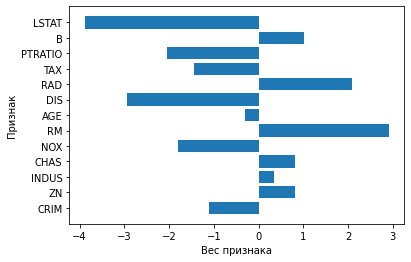

In [20]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [21]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [22]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

mse2 = mean_squared_error(y_test, y_pred)

print("mse до: {}".format(mse1))
print("mse после: {}".format(mse2))

NameError: name 'mean_squared_error' is not defined

In [23]:
from sklearn.metrics import r2_score

In [29]:
R2 = r2_score(y_pred, y_test)
R2

0.6464244009047961

In [30]:
from sklearn.ensemble import RandomForestRegressor


NameError: name 'scores' is not defined

In [53]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
max_depth_values = np.arange(2, 20)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 4 == 2:
        print('K = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

ValueError: Unknown label type: 'continuous'

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(1, 12),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
)

In [61]:
clf.fit(X_train, y_train.values[:, 0])

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 558, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\anaconda\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\anaconda\lib\site-packages\sk

ValueError: Unknown label type: 'continuous'

In [64]:
clf = RandomForestClassifier(max_depth=12, max_features=6, n_estimators=1000)

clf.fit(X_train.values[:, 0], y_train.values[:, 0])

y_pred = clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[2.98500e-02 1.31580e-01 1.71420e-01 1.05393e+00 1.55757e+01 4.54192e+00
 3.23700e-02 6.79208e+01 6.04700e-02 1.49320e-01 1.07930e-01 1.81590e-01
 7.61620e-01 1.00245e+00 5.20140e-01 1.02330e+01 6.71910e-01 1.44550e-01
 1.11320e-01 1.28020e-01 8.01400e-02 1.22358e+00 3.56868e+00 1.30580e-01
 1.42310e-01 6.66400e-02 8.66400e-02 1.14600e-01 2.77974e+00 1.11081e+01
 7.99248e+00 8.98296e+00 6.12700e-02 3.58090e-01 6.71772e+00 1.62864e+00
 5.66998e+00 5.78900e-02 3.83684e+00 2.30040e+00 1.77830e-01 1.33598e+01
 2.50461e+01 2.18700e-02 1.90730e-01 2.63630e-01 1.10874e+01 2.37934e+00
 4.20300e-02 1.12658e+00 6.23560e-01 5.51500e-02 3.55100e-02 1.64390e-01
 2.92400e+00 1.51902e+00 3.15000e-02 4.62960e-01 7.89600e-02 7.90410e-01
 4.75237e+00 3.68940e-01 1.44760e-01 9.06000e-03 9.26600e-02 2.81838e+00
 3.84970e+00 2.48017e+01 2.98190e-01 5.34120e-01 5.11830e-01 2.43938e+01
 4.87141e+00 9.74400e-02 4.01100e-02 5.44520e-01 4.89822e+00 1.96570e-01
 3.87100e-02 2.36482e+01 1.03280e-01 1.00840e-01 5.30200e-02 7.85700e-01
 8.82900e-02 3.47428e+00 6.07600e-02 1.30100e-02 1.34284e+00 1.65660e+00
 5.42500e-02 7.67202e+00 8.30800e-02 4.02020e-01 2.24890e-01 2.00849e+01
 2.11610e-01 4.46200e-02 1.75050e-01 2.45220e-01 1.80028e+00 6.39312e+00
 5.56100e-02 5.37200e-02 3.76800e-02 9.82349e+00 2.15505e+00 5.87205e+00
 2.36862e+00 7.36711e+00 4.29700e-02 1.50380e-01 2.07460e-01 1.15040e-01
 4.09740e+00 9.25200e-02 9.60400e-02 1.20830e-01 1.70900e-02 9.29900e-02
 1.00080e-01 2.17700e-02 3.39830e-01 2.37857e+00 3.53700e-02 4.30100e-02
 5.11358e+01 9.91655e+00 1.96500e-02 1.69020e-01 5.47900e-02 6.14700e-01
 1.20482e+01 1.14250e-01 8.81250e-01 8.79212e+00 7.88600e-02 5.02300e-02
 8.89762e+01 5.82401e+00 5.20177e+00 1.41030e-01 8.19900e-02 6.53876e+00
 1.36781e+01 1.23290e-01 5.78000e-02 2.63548e+00 2.49800e-02 5.08300e-02
 4.83567e+00 8.20058e+00 3.31470e-01 3.69200e-01 2.24236e+00 3.22640e-01
 4.66600e-02 6.63510e-01 5.75290e-01 1.71340e-01 6.89900e-02 7.24400e-02
 3.15330e-01 2.07162e+01 6.15100e-02 2.59150e-01 1.09600e-02 1.80846e+01
 1.31170e-01 1.84982e+01 7.52601e+00 3.29820e-01 1.35222e+01 1.22690e-01
 1.78990e-01 3.58400e-02 1.50100e-02 5.73500e-02 1.02900e-01 5.60200e-02
 1.58603e+01 1.42502e+00 9.37800e-02 6.41700e-02 7.72990e-01 1.20742e+00
 3.32105e+00 9.59571e+00 2.89900e-02 4.07710e-01 1.22040e-01 4.33700e-02
 1.13290e-01 1.52880e+01 9.18702e+00 6.64200e-02 1.27440e-01 2.20511e+01
 5.29305e+00 2.29690e-01 6.12900e-02 4.81900e-02 1.08342e+01 6.90500e-02
 1.53800e-02 8.24809e+00 1.48660e-01 3.82140e-01 1.00623e+01 1.40520e-01
 1.22472e+01 2.31390e+00 8.18700e-02 3.61500e-02 1.98020e-01 1.71710e-01
 2.29270e-01 1.38799e+00 5.78340e-01 2.41030e-01 1.77800e-02 5.44114e+00
 9.55770e-01 8.64476e+00 5.37000e-01 5.40110e-01 4.59000e-02 1.83377e+00
 9.33889e+00 2.49800e-01 1.10270e-01 5.57780e-01 3.25430e-01 5.73116e+00
 2.11240e-01 3.03470e-01 1.30751e+01 1.95100e-02 4.41700e-02 6.37960e-01
 2.44668e+00 3.35900e-02 1.78667e+01 3.16360e+00 1.19511e+01 4.56000e-02
 2.10380e-01 9.39063e+00 1.09590e-01 3.04100e-02 5.20580e-01 2.51990e-01
 2.17190e-01 1.29320e-01 6.65492e+00 2.14090e-01 2.79570e-01 7.83932e+00
 1.00000e-01 6.21100e-02 9.06500e-02 3.44500e-02 1.46336e+00 1.59360e-01
 7.01300e-02 1.42362e+01 9.06800e-02 3.49400e-01 6.56650e-01 1.32620e-01
 4.98100e-02 8.15174e+00 2.73100e-02 6.28807e+00 1.50860e-01 2.19770e-01
 1.18123e+01 4.11300e-02 1.36420e-01 1.61282e+00 8.49213e+00 8.25260e-01
 3.76619e+01 3.69695e+00 3.93200e-02 5.49700e-02 1.43337e+01 5.36000e-02
 3.11300e-02 5.50070e-01 1.06120e-01 6.29760e-01 2.53560e-01 5.66000e-02
 2.25971e+01 2.21880e-01 2.01019e+00 6.61700e-02 2.39120e-01 9.76170e-01
 7.50300e-02 5.69175e+00 4.75470e-01 1.27570e-01 1.36000e-02 4.22239e+00
 8.87300e-02 3.69311e+00 8.44700e-02 1.06718e+01 8.37000e-02 4.52700e-02
 5.82115e+00 7.87500e-02 2.44953e+00 1.54450e-01 2.53870e-01 3.04900e-02
 3.30450e-01 8.22100e-02 8.52040e-01 2.69380e-01 6.80117e+00 1.27346e+00
 1.04690e-01 9.96654e+00 6.91100e-02 1.68118e+01 8.26500e-02 2.86558e+01
 2.54300e-02 6.11540e-01 4.92980e-01 2.73397e+00 3.40060e-01 1.49632e+00
 4.26131e+00 6.86000e-02 8.26725e+00 7.15100e-02 7.75223e+00 4.54400e-02
 2.89550e-01 3.77498e+00 7.16500e-02 4.74100e-02 1.25179e+00 1.25790e-01
 1.58760e-01 1.71200e-01 2.99160e-01 1.50100e-02 1.11604e+01 2.28760e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.